In [1]:
from local_vars import root_folder

data_folder = r"CirclesA"
image_size = 128
batch_size = 50

In [2]:
import itertools
import keras

from keras.models import Sequential
from keras.layers import Activation, GlobalAveragePooling2D
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.utils import Sequence

from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from skimage.io import imread
from skimage.transform import resize

Using TensorFlow backend.


In [3]:
import os

data_fullpath = os.path.join(root_folder, data_folder)
train_fullpath = os.path.join(data_fullpath, "train")
valid_fullpath = os.path.join(data_fullpath, "valid")
test_fullpath = os.path.join(data_fullpath, "test")

print("Training data folder:    {}".format(train_fullpath))
print("Validation data folder:  {}".format(valid_fullpath))
print("Test data folder:        {}".format(test_fullpath))

Training data folder:    m:\Temp\CirclesA\train
Validation data folder:  m:\Temp\CirclesA\valid
Test data folder:        m:\Temp\CirclesA\test


In [4]:
import numpy as np

train_images_fullpath = os.path.join(train_fullpath, "images.npy")
train_classes_fullpath = os.path.join(train_fullpath, "classes.npy")
train_image_data = np.load(train_images_fullpath)
train_class_data = np.load(train_classes_fullpath)

num_train_images = train_image_data.shape[0]
train_image_min_value = np.amin(train_image_data)
train_image_max_value = np.amax(train_image_data)

valid_images_fullpath = os.path.join(valid_fullpath, "images.npy")
valid_classes_fullpath = os.path.join(valid_fullpath, "classes.npy")
valid_image_data = np.load(valid_images_fullpath)
valid_class_data = np.load(valid_classes_fullpath)

num_valid_images = valid_image_data.shape[0]
valid_image_min_value = np.amin(valid_image_data)
valid_image_max_value = np.amax(valid_image_data)

test_images_fullpath = os.path.join(test_fullpath, "images.npy")
test_classes_fullpath = os.path.join(test_fullpath, "classes.npy")
test_locations_fullpath = os.path.join(test_fullpath, "locations.npy")
test_image_data = np.load(test_images_fullpath)
test_class_data = np.load(test_classes_fullpath)
test_locations_data = np.load(test_locations_fullpath)

num_test_images = test_image_data.shape[0]
test_image_min_value = np.amin(test_image_data)
test_image_max_value = np.amax(test_image_data)

In [5]:
print("Found training images:   {}".format(num_train_images))
print("Pixel intensity range:   {} to {}".format(train_image_min_value, train_image_max_value))
print("Image size:              {} x {}".format(train_image_data.shape[1], train_image_data.shape[2]))
print("")
print("Found validation images: {}".format(num_valid_images))
print("Pixel intensity range:   {} to {}".format(valid_image_min_value, valid_image_max_value))
print("Image size:              {} x {}".format(valid_image_data.shape[1], valid_image_data.shape[2]))
print("")
print("Found test images:       {}".format(num_test_images))
print("Pixel intensity range:   {} to {}".format(test_image_min_value, test_image_max_value))
print("Image size:              {} x {}".format(test_image_data.shape[1], test_image_data.shape[2]))

Found training images:   10000
Pixel intensity range:   0.0 to 1.0
Image size:              128 x 128

Found validation images: 200
Pixel intensity range:   0.0 to 1.0
Image size:              128 x 128

Found test images:       200
Pixel intensity range:   0.0 to 1.0
Image size:              128 x 128


In [6]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(image_size, image_size, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
__________

In [7]:
num_validation_steps = num_valid_images // batch_size
num_train_steps = num_train_images // batch_size

print("Training steps:   {}".format(num_train_steps))
print("Validation steps: {}".format(num_validation_steps))

Training steps:   200
Validation steps: 4


In [8]:
model.compile(Adam(lr=.0001), loss='mse', metrics=['accuracy'])

In [9]:
num_epochs = 10

history = model.fit(
    train_image_data,
    train_class_data,
    batch_size=100,
    epochs=num_epochs,
    verbose=1,
    validation_data=(valid_image_data, valid_class_data))

Train on 10000 samples, validate on 200 samples
Epoch 1/10
10000/10000 [==============================] - 60s 6ms/step - loss: 0.2500 - acc: 0.5102 - val_loss: 0.2500 - val_acc: 0.455046s - loss: 0.2500 - a - E - ETA: 16s - loss: 0.2500 - acc - ETA: 12s - loss: 0.2500 - acc - ETA: 9s - loss: 0.2500 - acc:  - ETA: 4s - loss: 0.2500 - acc:
Epoch 2/10
10000/10000 [==============================] - 6s 636us/step - loss: 0.2500 - acc: 0.4964 - val_loss: 0.2507 - val_acc: 0.4550 - loss: 0. - ETA: 0s - loss: 0.2500 -  - ETA: 0s - loss: 0.2500 - acc: 0.
Epoch 3/10
10000/10000 [==============================] - 6s 636us/step - loss: 0.2498 - acc: 0.5028 - val_loss: 0.2491 - val_acc: 0.5450- loss: 0.2499 - acc: - ETA: 4s - loss: 0.2499 - acc - ET - ETA: 1s - - ETA: 0s - loss: 0.2498 - acc: 0.5
Epoch 4/10
10000/10000 [==============================] - 6s 633us/step - loss: 0.2498 - acc: 0.5087 - val_loss: 0.2491 - val_acc: 0.5450s - loss: 0.2501 - acc: 0 - ETA: 4s - loss: 0.2 - ETA: 3s - loss: 0.

Text(0.5,1,'Accuracy Curves')

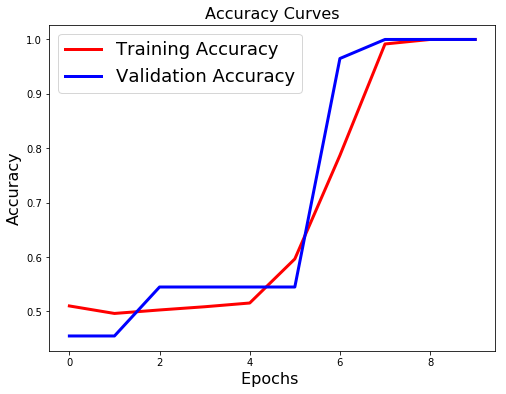

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [56]:
from_index = 0
num_test_vis = 12
to_index = from_index + num_test_vis

print("Test index range: {} -- {}".format(from_index, to_index))


x = test_image_data[from_index:to_index]
y = test_class_data[from_index:to_index]
y_locs = test_locations_data[from_index:to_index]
y_locs = y_locs / float(image_size)

print("\nTest input shape: {}".format(x.shape))

print("")
print("True locations")
print(y_locs[:5])

y_pred_oh = model.predict(x)
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# print("\nTest predictions:\n{0:0.2f}".format(y_pred_oh[:5]))
print("\nTest predictions:\n{}".format(y_pred_oh[:5]))
np.set_printoptions()

y_pred_class = [np.where(r==1)[0][0] for r in np.rint(y_pred_oh)]
print("\nPredicted classes")
print(y_pred_class[:5])

Test index range: 0 -- 12

Test input shape: (12, 128, 128, 1)

True locations
[[0.   0.  ]
 [0.   0.  ]
 [0.36 0.8 ]
 [0.   0.  ]
 [0.47 0.27]]

Test predictions:
[[0.96 0.04]
 [0.97 0.03]
 [0.00 1.00]
 [0.96 0.04]
 [0.01 0.99]]

Predicted classes
[0, 0, 1, 0, 1]


Layer index for CAM = 12

Generating heatmaps...


IntProgress(value=0, max=11)

Min value of all heatmaps = 0.0
Max value of all heatmaps = 0.0


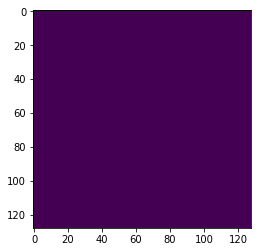

In [61]:
from vis.visualization import visualize_cam
from vis.utils import utils

from ipywidgets import IntProgress
from IPython.display import display

layer_index = utils.find_layer_idx(model, "dense_1")
print("Layer index for CAM = {}".format(layer_index))

heat_map = np.zeros([num_test_images, image_size, image_size], dtype="float")

print("\nGenerating heatmaps...")
f = IntProgress(min=0, max=num_test_vis - 1)
display(f)

for i in range(num_test_vis):
    f.value = i
    heat_map[i][:,:] = visualize_cam(model, layer_index, None, x[from_index + i])

print("Min value of all heatmaps = {}".format(np.min(heat_map)))
print("Max value of all heatmaps = {}".format(np.max(heat_map)))
out = plt.imshow(heat_map[2])

In [57]:
from numpy import unravel_index

y_pred_locs = np.zeros([num_test_vis, 2])

for i in range(num_test_vis):
    maxindex = unravel_index(heat_map[i][:,:].argmax(), heat_map[i].shape)
    if y_pred[i] == 0:
        y_pred_locs[i] = [0, 0]
    else:
        y_pred_locs[i] = (maxindex[1], maxindex[0])

y_pred_locs = y_pred_locs / float(image_size)

print(y_pred_locs[:5])

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [30]:
n = len(y_pred_locs)
print("n = {}".format(n))
average_error = 0.0
averaging_factor = 1.0 / n
for i in range(n):
    distance = np.linalg.norm(y_pred_locs[i] - y_locs[i])
    average_error += distance * averaging_factor

print("Average error: {0:.4f}".format(average_error))    

n = 12
Average error: 0.4238


In [11]:
def plots(ims, ys, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        sp.set_title(str(y[i]), fontsize=16)
        plt.imshow(ims[i][:, :, 0], cmap='gray')
        plt.axvline(x=ys[i][0])
        plt.axhline(y=ys[i][1])
        

def cplots(ims, ys, figsize=(20,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(str(titles[i]), fontsize=16)
        plt.imshow(ims[i][:, :], cmap='jet')
        # out = plt.colorbar()

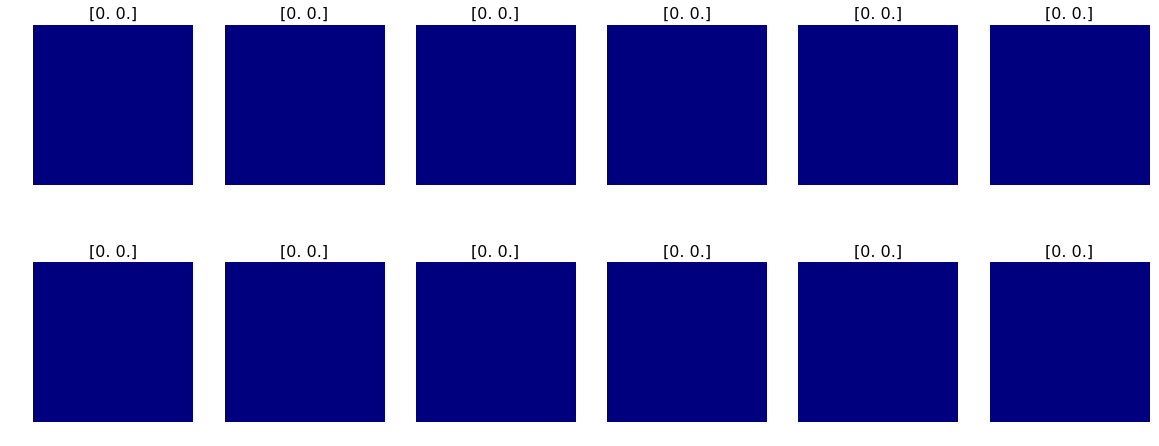

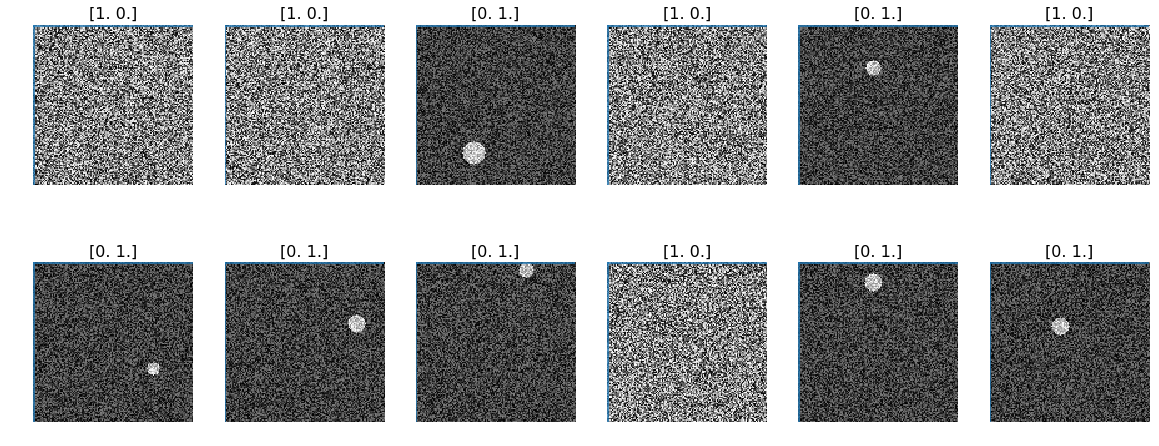

In [31]:
cplots(heat_map[:num_test_vis],
       y[from_index:(from_index + num_test_vis)],
       figsize=(20,8),
       rows=2,
       titles=y_pred_locs)

plots(x[from_index:(from_index + num_test_vis)],
      y_pred_locs[from_index:(from_index + num_test_vis)] * image_size,
      figsize=(20,8),
      rows=2,
      titles=y[from_index:(from_index + num_test_vis)])

In [ ]:
# Saving weights into file tagged with timestamp, every time this block runs.

import datetime

timestamp = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

weights_folder = os.path.join(root_folder, "weights")

if not os.path.exists(weights_folder):
    os.makedirs(weights_folder)
    print("Creating folder: {}".format(weights_folder))

weights_file_name = "weights_" + timestamp + ".h5"
weights_file_path = os.path.join(weights_folder, weights_file_name)

model.save_weights(weights_file_path)